In [1]:
from numpy import random, vstack, stack, dot, cov, diag, array, arange, argmax, float32, mean, sqrt
from numpy.linalg import inv, eig
import matplotlib.pyplot as plt

## -----------------------------------------------PCA-----------------------------------------------

### Dateset

In [2]:
c1 = array( [[1,2], [2,3], [3,3], [4,5], [5,5] ], dtype = float32)
c2 = array( [[1,0], [2,1], [3,1], [3,2], [5,3], [6,5]], dtype = float32)
print(c1.shape)

(5, 2)


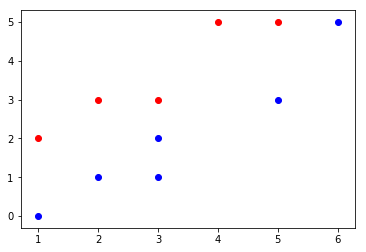

In [43]:
plt.scatter(c1[:,0],c1[:,1],c='r')
plt.scatter(c2[:,0],c2[:,1],c='b')
plt.show()

### Covariance of [ c1; c2 ] 

In [3]:
c1c2 = vstack((c1,c2))

In [4]:
Z = cov(c1c2.T)
print(Z)

[[ 2.76363636  2.25454545]
 [ 2.25454545  3.01818182]]


### Eigenvectors and Eigenvalues of Z

In [5]:
D, V = eig(Z)
print(diag(D))
print(V)

[[ 0.63277412  0.        ]
 [ 0.          5.14904406]]
[[-0.72676058 -0.68689087]
 [ 0.68689087 -0.72676058]]


### The direction of PCA projection

In [6]:
PCA_projection = V[:, argmax(D)]
print(PCA_projection)

1
[-0.68689087 -0.72676058]


## ------------------------------------------------------------LDA------------------------------------------------

### The mean of each class

In [36]:
mu1 = mean(c1, axis=0).reshape((2, 1))
mu2 = mean(c2, axis=0).reshape((2, 1))
Sb = dot((mu1 - mu2), (mu1 - mu2).T)
print(Sb)

[[ 0.11111106 -0.53333318]
 [-0.53333318  2.5599997 ]]


### The scatter of each class

In [37]:
s1 =  cov(c1.T) * ( c1.shape[0] - 1 )
s2 =  cov(c2.T) * ( c2.shape[0] - 1 )
print(s1)
Sw = s1 + s2
print(Sw)

[[ 10.    8. ]
 [  8.    7.2]]
[[ 27.33333333  24.        ]
 [ 24.          23.2       ]]


In [38]:
Sw_1Sb = dot(inv(Sw), Sb)
print(Sw_1Sb)

[[ 0.26452591 -1.26972459]
 [-0.29663599  1.42385301]]


### Eigenvectors and Eigenvalues of Sw_1Sb

In [39]:
ss_D, ss_V = eig(Sw_1Sb)
print(ss_V)
print(ss_D)

[[-0.97898043  0.66555693]
 [-0.20395422 -0.74634708]]
[ -3.23880922e-11   1.68837892e+00]


one of the eigenvalues of Sw_1Sb is ** zero** ,so one direction of data is useless after the LDA transfrom of 2-classify problem.

In [40]:
print(ss_V[:,argmax(ss_D)])

[ 0.66555693 -0.74634708]


### Alternatively

In [41]:
LDA_projection=dot(inv(Sw), (mu1 - mu2))
print(LDA_projection)

[[-0.79357791]
 [ 0.88990818]]


### After normalization

In [42]:
m = dot(LDA_projection.T, LDA_projection)
print(LDA_projection / sqrt(m))

[[-0.66555693]
 [ 0.74634708]]


In [44]:
x = arange(-3,6,0.5)
print(x)
PCA = PCA_projection[1] / PCA_projection[0] * x
LDA = LDA_projection[1] / LDA_projection[0] * x
print(PCA)
print(LDA)

[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.
  4.5  5.   5.5]
[-3.17413121 -2.64510934 -2.11608748 -1.58706561 -1.05804374 -0.52902187
  0.          0.52902187  1.05804374  1.58706561  2.11608748  2.64510934
  3.17413121  3.70315308  4.23217495  4.76119682  5.29021869  5.81924056]
[ 3.36416186  2.80346821  2.24277457  1.68208093  1.12138729  0.56069364
 -0.         -0.56069364 -1.12138729 -1.68208093 -2.24277457 -2.80346821
 -3.36416186 -3.9248555  -4.48554914 -5.04624279 -5.60693643 -6.16763007]


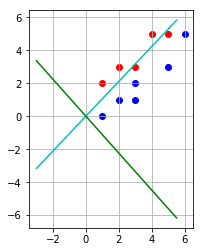

In [45]:
plt.scatter(c1[:,0],c1[:,1],c='r')
plt.scatter(c2[:,0],c2[:,1],c='b')
plt.plot(x, PCA,c='c')
plt.plot(x, LDA,c='g')
ax = plt.gca()
ax.set_aspect(1)
ax.grid(True)
plt.show()

### 3-Class LDA

In [91]:
N1 = 1000; N2 = 500; N3 = 2000;
#mu = [0,0]
#cov = [[1, 0], [0, 1]]
X1 = random.multivariate_normal([0,0], [[1, 0], [0, 1]],  N1) 
X2 = random.multivariate_normal([3, 6], [[1, -0.8], [-0.8, 1]], N2)
X3 = random.multivariate_normal([10, 6], [[1, 0.8], [0.8, 1]], N3)

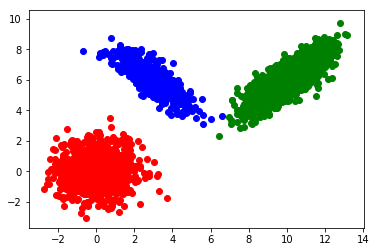

In [92]:
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.scatter(X2[:, 0], X2[:, 1], c='b')
plt.scatter(X3[:, 0], X3[:, 1], c='g')
plt.show()

In [93]:
S1 = (N1-1) * cov(X1.T)
S2 = (N2-1) * cov(X2.T)
S3 = (N3-1) * cov(X3.T)
print(S1)

[[ 1012.43232734    16.45067208]
 [   16.45067208   986.06093183]]


In [94]:
Sw = S1 + S2 + S3
M1 = mean(X1, axis = 0); M2 = mean(X2, axis = 0); M3 = mean(X3, axis = 0);
Mu = (N1 * M1 + N2 * M2 + N3 * M3) / (N1 + N2 + N3)
Sb = N1 * dot((M1-Mu).T, (M1-Mu)) + N2 * dot((M2-Mu).T, (M2-Mu)) + N3 * dot((M3-Mu).T, (M3-Mu))
print(Sb)
J = inv(Sw) * Sb
D3, V3 = eig(J)

97699.2347661


In [95]:
print(D3)
print(V3)

[ 20.67494357  41.76970861]
[[-0.72020814  0.69375805]
 [-0.69375805 -0.72020814]]


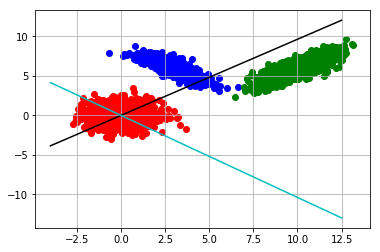

In [96]:
x3 = arange(-4,13,0.5)
LDA3_1 = V3[1,0] / V3[0,0] * x3
LDA3_2 = V3[1,1] / V3[0,1] * x3
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.scatter(X2[:, 0], X2[:, 1], c='b')
plt.scatter(X3[:, 0], X3[:, 1], c='g')
plt.plot(x3, LDA3_1,  c='black')
plt.plot(x3, LDA3_2,  c='c')
ax = plt.gca()
#ax.set_aspect(1)
ax.grid(True)
plt.show()

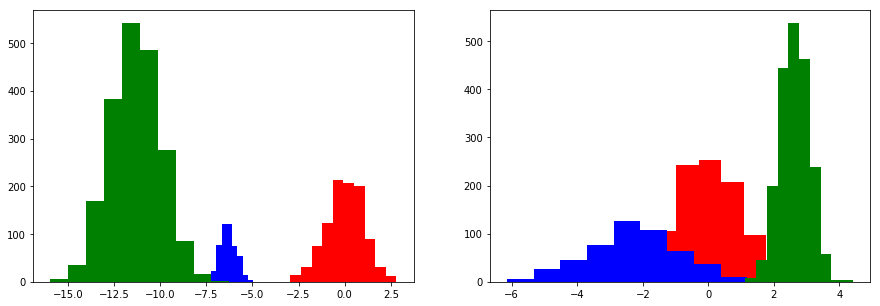

In [97]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
X1_1=dot(X1, V3[:,0]).reshape(-1,1)
X2_1=dot(X2, V3[:,0]).reshape(-1,1)
X3_1=dot(X3, V3[:,0]).reshape(-1,1)
ax[0].hist(X1_1,color='r')
ax[0].hist(X2_1,color='b')
ax[0].hist(X3_1,color='g')
X1_2=dot(X1, V3[:,1]).reshape(-1,1)
X2_2=dot(X2, V3[:,1]).reshape(-1,1)
X3_2=dot(X3, V3[:,1]).reshape(-1,1)
ax[1].hist(X1_2,color='r')
ax[1].hist(X2_2,color='b')
ax[1].hist(X3_2,color='g')
plt.show()